# Total Hours lost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt



In [2]:
import autopark2 as auto

In [3]:
lolz = pd.read_hdf("updated_rain_data.h5")

# Using auto to get total parked hours

In [4]:
wind = auto.get_data("all_wind_data.h5","2018-05-24", "2019-03-30")
rain = auto.get_data("updated_rain_data.h5","2018-05-24", "2019-03-30")

In [5]:
for data in [wind,rain]:
    type, threshold, name = auto.determine_data_type(data)
    if type == "rain":
        col = data.rain
        hyst_min = 10
        hyst_window = 10 
    else:
        col = data.v_max
        data = auto.wind_methods(data, threshold, 60)
        hyst_min = 0
        hyst_window = 2
    data = auto.make_decision(data, col,threshold, 60, hyst_min, hyst_window)
    data = data[data['take_data'] == True]
    

In [6]:
rain = rain[rain.take_data == True]
wind = wind[wind.take_data == True]

In [7]:
rain["rain_park"]= rain.park
wind['planned_take_data'] = wind.take_data
wind['actual_parked'] =wind.turned_off
wind['wind_park'] = wind.park




In [8]:
data_taking = pd.DataFrame(index=data.index)
data_taking = data_taking.join(rain.rain_park,how = 'outer')
data_taking = data_taking.join(wind.wind_park, how = 'outer')
data_taking = data_taking.join(wind.actual_parked, how = 'outer')
data_taking = data_taking.join(wind.planned_take_data, how = 'outer')

In [9]:
data_taking = data_taking[~data_taking.rain_park.isna()]

In [10]:
data_taking['rain_park'] = data_taking.rain_park.astype(bool)

In [11]:
data_taking.dtypes

rain_park              bool
wind_park              bool
actual_parked          bool
planned_take_data    object
dtype: object

In [12]:


data_taking["algorithm_parked"] = data_taking.rain_park | data_taking.wind_park

In [13]:
data_taking.index.min(),data_taking.index.max() 

(Timestamp('2018-05-24 03:26:00'), Timestamp('2019-03-30 20:20:00'))

In [14]:
data_taking[data_taking.algorithm_parked == True]

,rain_park,wind_park,actual_parked,planned_take_data,algorithm_parked
2018-05-24 03:26:00,True,False,True,True,True
2018-05-26 02:47:00,True,False,True,True,True
2018-05-26 02:48:00,True,False,True,True,True
2018-05-26 02:49:00,True,False,True,True,True
2018-05-26 02:50:00,True,False,True,True,True
2018-05-26 02:51:00,True,False,True,True,True
2018-05-26 02:52:00,True,False,True,True,True
2018-05-26 02:53:00,True,False,True,True,True
2018-05-26 02:54:00,True,False,True,True,True
2018-05-26 02:55:00,True,False,True,True,True


In [15]:
actual_data_taken = data_taking[data_taking['actual_parked'] == False]
actual_hours = (len(actual_data_taken))/60
print("Actual total number of data taking is ",actual_hours, " hours")

Actual total number of data taking is  2382.516666666667  hours


In [16]:
total_hours_planned = data_taking[data_taking.planned_take_data == True]
total_hours = (len(total_hours_planned))/60
total_hours_h = (len(data_taking.algorithm_parked))/60
print("Planned total number of hours of data taking is ",total_hours, " hours")
print(total_hours_h)

Planned total number of hours of data taking is  2713.1833333333334  hours
2713.1833333333334


In [17]:
algorithm_parked = data_taking[data_taking.algorithm_parked == False]
algorithm_parked_hours = (len(algorithm_parked))/60
print("With the algorithm, total number of hours data taking is ",algorithm_parked_hours," hours")


With the algorithm, total number of hours data taking is  2510.95  hours


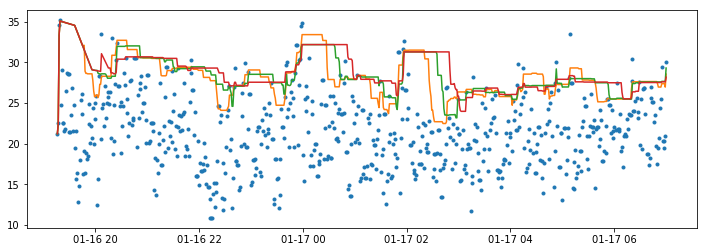

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(wind['2019-01-16 16:00':'2019-01-17 16:00'].v_max, '.')
plt.plot(wind['2019-01-16 16:00':'2019-01-17 16:00'].v_max.rolling('30min').quantile(0.95))
plt.plot(wind['2019-01-16 16:00':'2019-01-17 16:00'].v_max.rolling('45min').quantile(0.95))
plt.plot(wind['2019-01-16 16:00':'2019-01-17 16:00'].v_max.rolling('60min').quantile(0.95))
